In [31]:
## exercise based on this tutorial
## https://www.datacamp.com/community/tutorials/finance-python-trading



import pandas_datareader as pdr
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))

In [9]:
aapl.loc['2007-01-03']

High         1.236857e+01
Low          1.170000e+01
Open         1.232714e+01
Close        1.197143e+01
Volume       3.095799e+08
Adj Close    1.039169e+01
Name: 2007-01-03 00:00:00, dtype: float64

In [17]:
aapl.iloc[22:24]

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2006-11-01  11.625714  11.194285  11.585714  11.308572  152798100   9.816303
2006-11-02  11.331429  11.214286  11.274285  11.282857  116370800   9.793979

In [19]:
sample = aapl.sample(20)
sample

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2010-09-09  38.074287  37.560001  37.862858  37.581429  109643800  32.622215
2010-04-21  37.178570  36.532856  36.971428  37.031429  245597800  32.144798
2010-04-09  34.555714  34.351429  34.490002  34.541428   83545700  29.983374
2008-12-23  12.552857  12.271428  12.410000  12.340000  158757900  10.711625
2010-11-23  44.535713  43.794285  44.349998  44.104286  129861900  38.284325
2006-12-15  12.745714  12.475715  12.717143  12.531428  184984800  10.877792
2010-12-31  46.211430  45.901428  46.135715  46.080002   48377000  39.999332
2007-03-13  12.942857  12.628572  12.772857  12.628572  216972700  10.962116
2011-07-25  57.142857  55.660000  55.764286  56.928570  147451500  49.416325
2011-09-20  60.408573  58.741428  59.321430  59.064285  193938500  51.270206
2008-05-16  27.185715  26.714285  27.158571  26.802856  191442300  23.265972
2008-06-20  25.857143  25.000000  25.621429  25.038572  222091800  21.734507
2010-01-26  30.530001  28.940001  29.421429  29.420000  466777500  25.537760
2009-10-13  27.309999  27.100000  27.232857  27.145714   87005100  23.563583
2008-10-23  14.178572  13.128572  13.787143  14.032857  418857600  12.181094
2007-11-12  23.957144  21.518572  23.611429  21.965714  442266300  19.067135
2011-04-14  48.000000  47.437141  47.828571  47.488571   75450200  41.222008
2007-04-02  13.464286  13.288571  13.448571  13.378572  125498100  11.613148
2011-04-08  48.592857  47.707142  48.560001  47.865715   94383800  41.549393
2010-08-18  36.381428  35.939999  36.051430  36.152859   84924000  31.382154

In [20]:
monthly_aapl = aapl.resample('M').mean()

In [21]:
monthly_aapl

High        Low       Open      Close        Volume  \
Date                                                                   
2006-10-31  11.123766  10.893117  11.002922  11.017987  1.634995e+08   
2006-11-30  12.314626  12.028980  12.161565  12.192109  1.647010e+08   
2006-12-31  12.546500  12.205571  12.415857  12.353071  2.111349e+08   
2007-01-31  12.880857  12.522572  12.722357  12.697357  3.401223e+08   
2007-02-28  12.382932  12.111804  12.252105  12.246842  1.805573e+08   
...               ...        ...        ...        ...           ...   
2011-08-31  54.550000  53.021304  53.894347  53.823230  1.754630e+08   
2011-09-30  56.745918  55.438096  56.054217  56.070476  1.425887e+08   
2011-10-31  57.402380  55.932245  56.677687  56.747143  1.564456e+08   
2011-11-30  55.554218  54.526599  55.181157  54.973606  1.067107e+08   
2011-12-31  56.523537  55.734217  56.110068  56.132925  7.507777e+07   

            Adj Close  
Date                   
2006-10-31   9.564062  
2006-11-30  10.583248  
2006-12-31  10.722971  
2007-01-31  11.021825  
2007-02-28  10.630759  
...               ...  
2011-08-31  46.720762  
2011-09-30  48.671463  
2011-10-31  49.258838  
2011-11-30  47.719333  
2011-12-31  48.725673  

[63 rows x 6 columns]

In [22]:
aapl['diff'] = aapl.Open - aapl.Close

In [25]:
del aapl['diff']

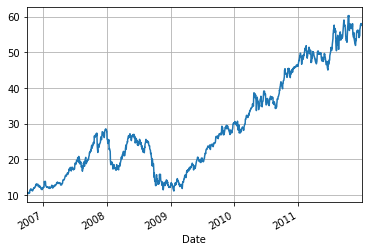

In [30]:
aapl['Close'].plot(grid=True)

In [32]:
daily_close = aapl[['Adj Close']]

In [33]:
daily_pct_change = daily_close.pct_change()

In [39]:
daily_pct_change.max()

Adj Close    0.139049
dtype: float64

In [40]:
daily_pct_change.fillna(0, inplace=True)

In [41]:
print(daily_pct_change)

Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007297
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006160
2011-12-30  -0.000296

[1323 rows x 1 columns]


In [42]:
daily_log_returns = np.log(daily_close.pct_change()+1)

In [43]:
daily_log_returns

Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017397
2006-10-05  -0.007323
2006-10-06  -0.008185
...               ...
2011-12-23   0.011922
2011-12-27   0.007903
2011-12-28  -0.009615
2011-12-29   0.006141
2011-12-30  -0.000296

[1323 rows x 1 columns]

In [44]:
monthly = aapl.resample('BM').apply(lambda x: x[-1])

In [48]:
quarter = aapl.resample("4M").mean()

In [49]:
quarter.pct_change()

High       Low      Open     Close    Volume  Adj Close
Date                                                                   
2006-10-31       NaN       NaN       NaN       NaN       NaN        NaN
2007-02-28  0.126451  0.121460  0.125777  0.122860  0.369611   0.122860
2007-06-30  0.195413  0.198331  0.196030  0.197735 -0.080296   0.197735
2007-10-31  0.404613  0.392010  0.400961  0.400796  0.306882   0.400796
2008-02-29  0.130711  0.117746  0.127066  0.120394  0.172293   0.120394
2008-06-30 -0.004290  0.005927 -0.003550  0.003673 -0.209762   0.003673
2008-10-31 -0.108879 -0.124618 -0.114267 -0.118803  0.133219  -0.118803
2009-02-28 -0.363388 -0.359305 -0.363639 -0.360865 -0.161601  -0.360865
2009-06-30  0.304359  0.324702  0.312134  0.316588 -0.386935   0.316588
2009-10-31  0.411193  0.425117  0.421239  0.415901 -0.158270   0.415901
2010-02-28  0.176085  0.172864  0.175612  0.173693  0.170633   0.173693
2010-06-30  0.223317  0.219063  0.223045  0.223611  0.203680   0.223611
2010-10-31  0.094268  0.099356  0.094380  0.096125 -0.157478   0.096125
2011-02-28  0.218082  0.225622  0.221393  0.221858 -0.230726   0.221858
2011-06-30  0.033863  0.031616  0.034143  0.031222 -0.043455   0.031222
2011-10-31  0.133189  0.124572  0.127202  0.130452  0.429821   0.130452
2012-02-29  0.008387  0.016799  0.013755  0.011002 -0.404723   0.011002

In [51]:
daily_pct_change.describe()

Adj Close
count  1323.000000
mean      0.001565
std       0.023983
min      -0.179195
25%      -0.010661
50%       0.001646
75%       0.014285
max       0.139049

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114adcbd0>]],
      dtype=object)

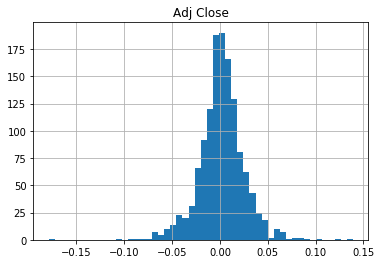

In [50]:
daily_pct_change.hist(bins=50)

In [52]:
cum_daily_return = (1 + daily_pct_change).cumprod()

In [53]:
cum_daily_return

Adj Close
Date                 
2006-10-02   1.000000
2006-10-03   0.989581
2006-10-04   1.006947
2006-10-05   0.999599
2006-10-06   0.991451
...               ...
2011-12-23   5.387791
2011-12-27   5.430539
2011-12-28   5.378574
2011-12-29   5.411704
2011-12-30   5.410101

[1323 rows x 1 columns]

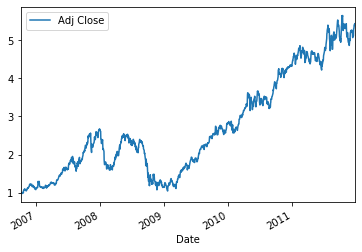

In [54]:
cum_daily_return.plot()

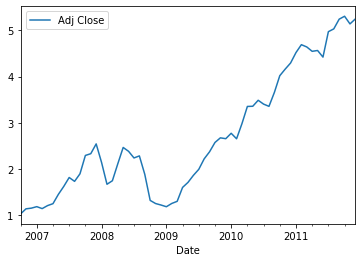

In [56]:
cum_monthly_return = cum_daily_return.resample("M").mean()
cum_monthly_return.plot()

In [58]:
cum_monthly_return.max(0)

Adj Close    5.306307
dtype: float64

In [59]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [60]:
tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

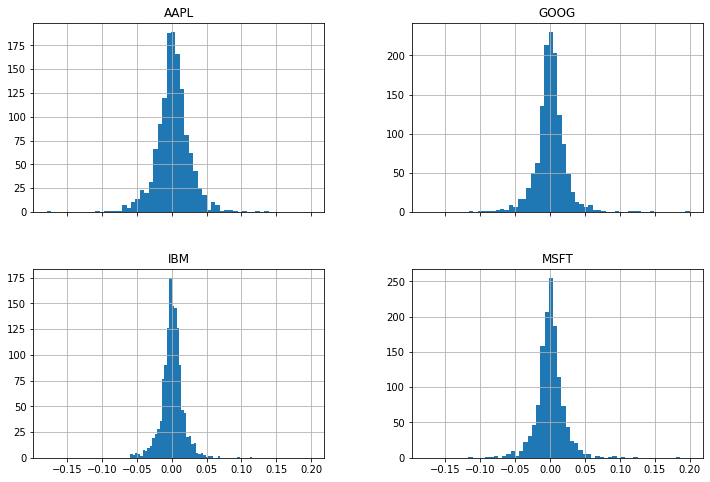

In [61]:

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

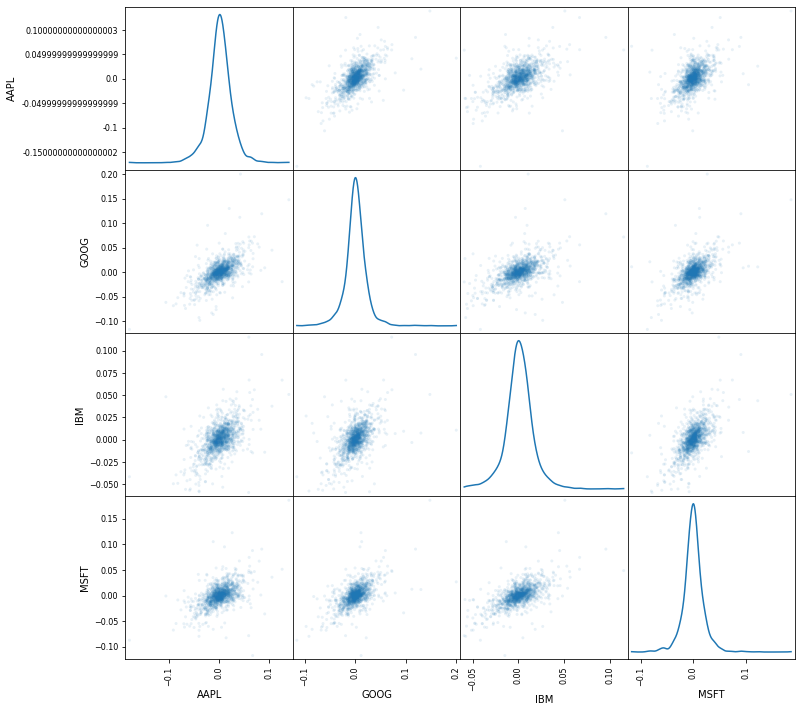

In [63]:
from pandas.plotting import scatter_matrix

# Plot a scatter matrix with the `daily_pct_change` data 
scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [64]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg[-10:])

Date
2011-12-16    48.202029
2011-12-19    48.168981
2011-12-20    48.138538
2011-12-21    48.134446
2011-12-22    48.128090
2011-12-23    48.123874
2011-12-27    48.128772
2011-12-28    48.122138
2011-12-29    48.148830
2011-12-30    48.172360
Name: Adj Close, dtype: float64


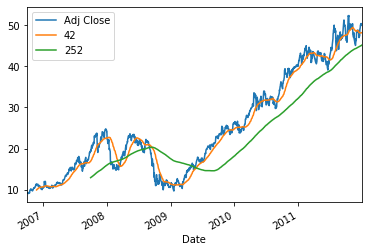

In [65]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

# Show plot
plt.show()

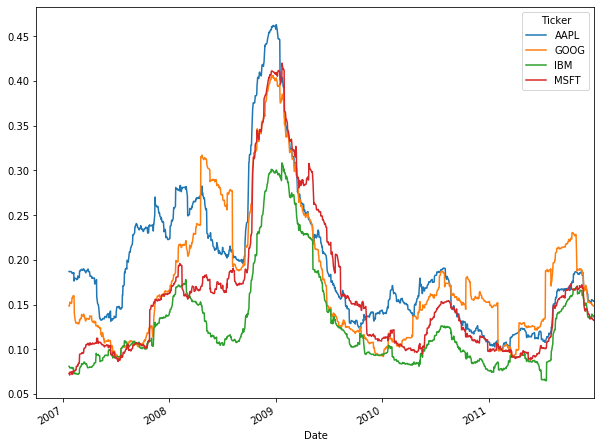

In [66]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [71]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm

# Import the `datetools` module from `pandas`
# from pandas import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           1.33e-96
Time:                        19:49:43   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.263      -0.001       0.000
A

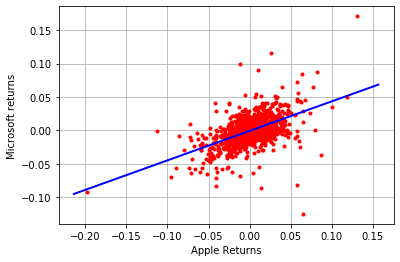

In [72]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

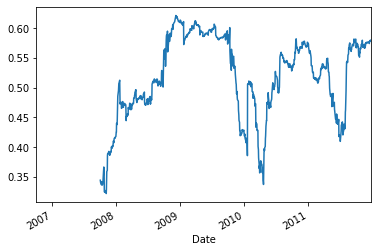

In [73]:
# Import matplotlib 
import matplotlib.pyplot as plt

# Plot the rolling correlation
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()

In [74]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

signal  short_mavg  long_mavg  positions
Date                                                
2006-10-02     0.0   10.694285  10.694285        NaN
2006-10-03     0.0   10.638571  10.638571        0.0
2006-10-04     0.0   10.681905  10.681905        0.0
2006-10-05     0.0   10.683928  10.683928        0.0
2006-10-06     0.0   10.667714  10.667714        0.0
...            ...         ...        ...        ...
2011-12-23     1.0   55.439643  55.406957        0.0
2011-12-27     0.0   55.445286  55.448614       -1.0
2011-12-28     0.0   55.437643  55.490072        0.0
2011-12-29     0.0   55.468393  55.564229        0.0
2011-12-30     0.0   55.495500  55.608500        0.0

[1323 rows x 4 columns]


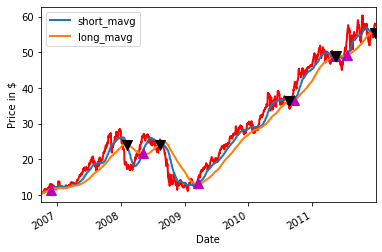

In [75]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [77]:
signals.loc[signals.positions == -1.0]

signal  short_mavg  long_mavg  positions
Date                                                
2008-02-06     0.0   24.165643  24.171186       -1.0
2008-08-11     0.0   24.123750  24.179629       -1.0
2010-08-24     0.0   36.358464  36.407500       -1.0
2011-05-11     0.0   48.928964  48.942643       -1.0
2011-05-16     0.0   49.018428  49.018857       -1.0
2011-12-27     0.0   55.445286  55.448614       -1.0

In [79]:
signals.loc[signals.positions == 1.0]

signal  short_mavg  long_mavg  positions
Date                                                
2006-11-28     1.0   11.538179  11.517596        1.0
2008-05-06     1.0   21.768572  21.712629        1.0
2009-03-19     1.0   13.279893  13.242629        1.0
2010-09-17     1.0   36.623107  36.592229        1.0
2011-05-12     1.0   48.988107  48.979729        1.0
2011-07-22     1.0   49.185678  49.115028        1.0

In [80]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portf())

AAPL  holdings      cash     total  returns
Date                                                   
2006-10-02   0.0       0.0  100000.0  100000.0      NaN
2006-10-03   0.0       0.0  100000.0  100000.0      0.0
2006-10-04   0.0       0.0  100000.0  100000.0      0.0
2006-10-05   0.0       0.0  100000.0  100000.0      0.0
2006-10-06   0.0       0.0  100000.0  100000.0      0.0


In [94]:
portfolio['returns'].max()

0.0025248748553172717

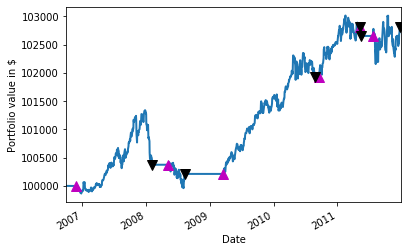

In [81]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [82]:
portfolio

AAPL     holdings           cash          total   returns
Date                                                                        
2011-12-23  5001.526642  5001.526642   97776.450729  102777.977371  0.000577
2011-12-27     0.000000     0.000000  102817.660141  102817.660141  0.000386
2011-12-28     0.000000     0.000000  102817.660141  102817.660141  0.000000
2011-12-29     0.000000     0.000000  102817.660141  102817.660141  0.000000
2011-12-30     0.000000     0.000000  102817.660141  102817.660141  0.000000

In [95]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.7259008013151205


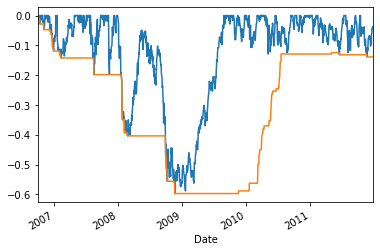

In [102]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0
# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [105]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days
# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

In [106]:
cagr

0.38234458820649775